# MNIST

This example takes from the official Pytorch tutorial on an [FGSM Adversal Attack](https://pytorch.org/tutorials/beginner/fgsm_tutorial.html) which was instrumental for us to figure out how to build the `dropviz` package.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

import dropviz

In [2]:
# LeNet Model definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [3]:
pretrained_model = "lenet_mnist_model.pth"
use_cuda=True

# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

# Initialize the network
model = Net().to(device)

# Load the pretrained model
model.load_state_dict(torch.load(pretrained_model, map_location='cpu'))

CUDA Available:  True


<All keys matched successfully>

In [13]:
# MNIST Test dataset and dataloader declaration
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data/mnist/', train=False, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ])),
        batch_size=1, shuffle=True)

# make the data loader iterable so we can call next()
data_iter = iter(test_loader)

# Augmenting by Layer FC1

Starting 0th sample...
Epoch 1, loss 0.5075182914733887
Epoch 1001, loss 0.09411180764436722
Epoch 2001, loss 0.05976586416363716
Final loss 0.04999539628624916


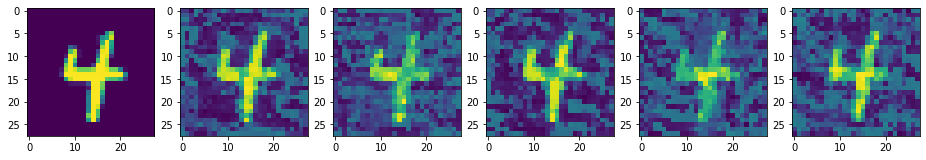

Starting 1th sample...
Epoch 1, loss 0.42144790291786194
Epoch 1001, loss 0.07510324567556381
Epoch 2001, loss 0.05529698356986046
Final loss 0.049981728196144104


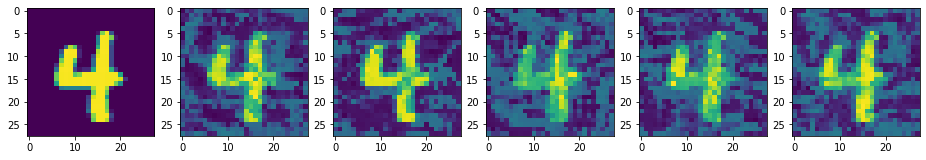

Starting 2th sample...
Epoch 1, loss 0.10067623853683472
Final loss 0.049920663237571716


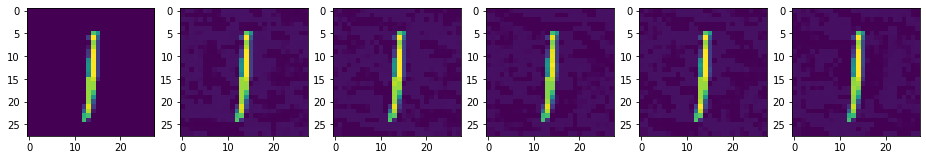

Starting 3th sample...
Epoch 1, loss 0.34853070974349976
Final loss 0.04998017102479935


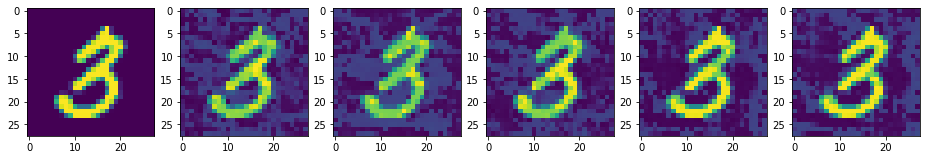

Starting 4th sample...
Epoch 1, loss 0.3087827265262604
Epoch 1001, loss 0.07675109058618546
Final loss 0.049984440207481384


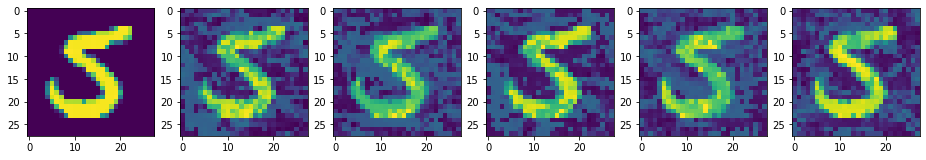

Starting 5th sample...
Epoch 1, loss 0.17949171364307404
Final loss 0.04995552822947502


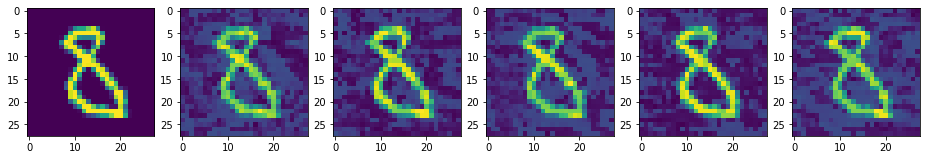

Starting 6th sample...
Epoch 1, loss 0.2943306267261505
Epoch 1001, loss 0.049999263137578964
Final loss 0.049999263137578964


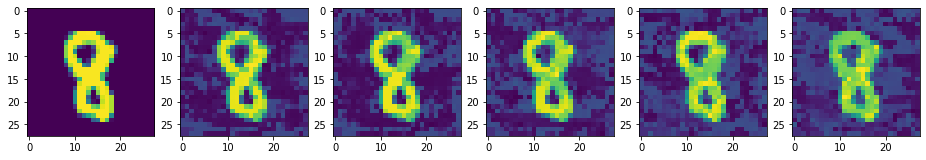

Starting 7th sample...
Epoch 1, loss 0.12109990417957306
Final loss 0.04995954409241676


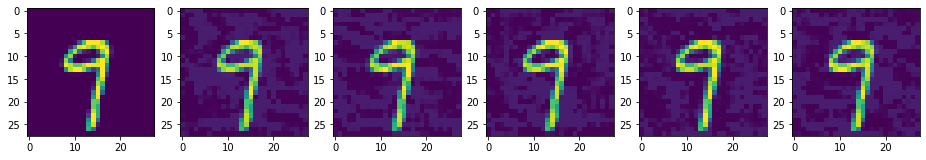

Starting 8th sample...
Epoch 1, loss 0.23105227947235107
Final loss 0.049999166280031204


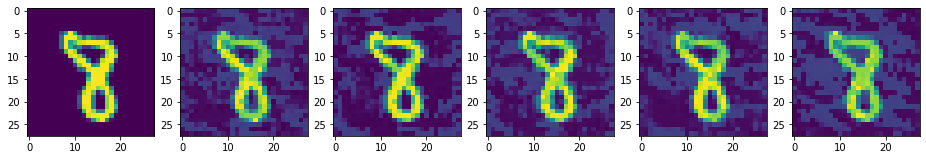

Starting 9th sample...
Epoch 1, loss 0.573943018913269
Epoch 1001, loss 0.09313920885324478


In [ ]:
N = 10

for i in range(N):
    print(f'Starting {i}th sample...')
    
    # sample
    data, target = next(data_iter)

    # augment
    corrupted_images, output = dropviz.augment(model, model.fc1, device, data, 5, 10000, 0.05, 0.0001)
    
    # plot
    f, ax = plt.subplots(1, len(corrupted_images)+1, figsize=(16,20))
    ax[0].imshow(data.reshape(28, 28))
    for n in range(len(corrupted_images)):
        ax[n+1].imshow(corrupted_images[n])
    plt.show()

# Augmenting by Layer FC2

Starting 0th sample...
Epoch 1, loss 0.907048761844635
Epoch 1001, loss 0.19118092954158783
Final loss 0.09998690336942673


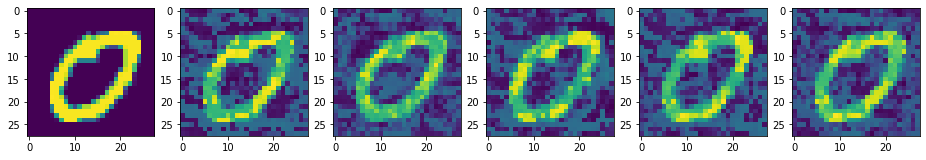

Starting 1th sample...
Epoch 1, loss 1.9631344079971313
Epoch 1001, loss 0.46880897879600525
Epoch 2001, loss 0.20262305438518524
Epoch 3001, loss 0.13106660544872284
Epoch 4001, loss 0.10375245660543442
Final loss 0.09996824711561203


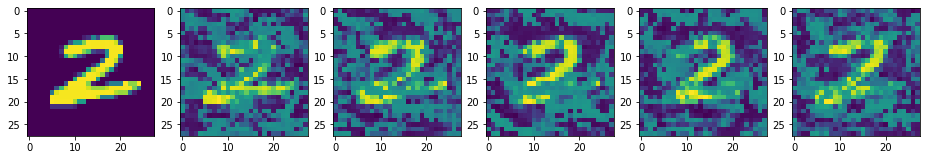

Starting 2th sample...
Epoch 1, loss 1.6658810377120972
Epoch 1001, loss 0.23850230872631073
Epoch 2001, loss 0.23503006994724274
Epoch 3001, loss 0.12698398530483246
Final loss 0.09997614473104477


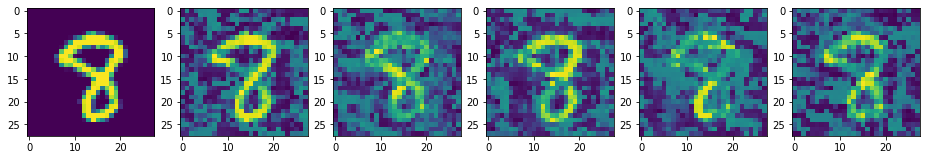

Starting 3th sample...
Epoch 1, loss 2.245696544647217
Epoch 1001, loss 0.42763587832450867
Epoch 2001, loss 0.1620209664106369
Final loss 0.09997613728046417


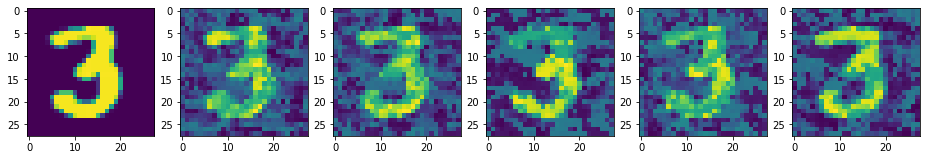

Starting 4th sample...
Epoch 1, loss 1.5069152116775513
Epoch 1001, loss 0.26693910360336304
Epoch 2001, loss 0.1129634827375412
Final loss 0.09996652603149414


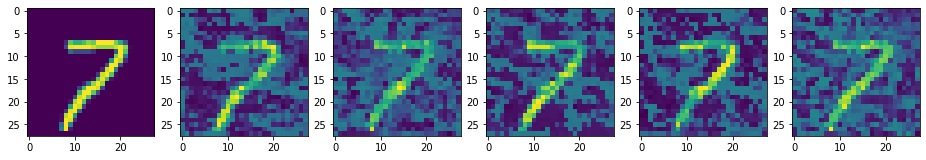

Starting 5th sample...
Epoch 1, loss 2.615137815475464
Epoch 1001, loss 0.8838517665863037
Epoch 2001, loss 0.5598387718200684
Epoch 3001, loss 0.38167044520378113
Epoch 4001, loss 0.24045948684215546
Epoch 5001, loss 0.16858607530593872
Epoch 6001, loss 0.13041777908802032
Epoch 7001, loss 0.10831546783447266
Final loss 0.09998948872089386


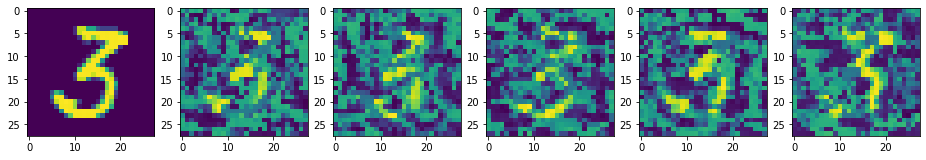

Starting 6th sample...
Epoch 1, loss 0.6631149053573608
Epoch 1001, loss 0.13181966543197632
Final loss 0.09990328550338745


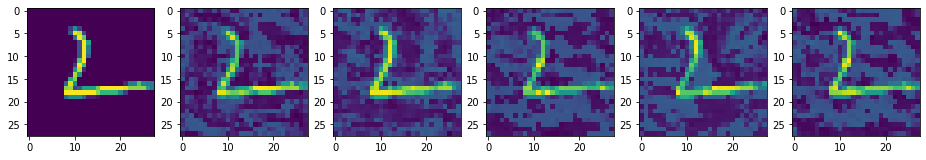

Starting 7th sample...
Epoch 1, loss 0.47435230016708374
Final loss 0.09987150132656097


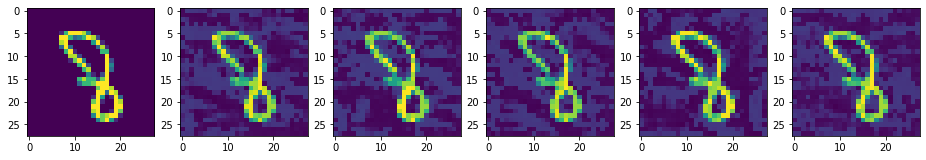

Starting 8th sample...
Epoch 1, loss 2.2412009239196777
Epoch 1001, loss 0.3695443570613861
Epoch 2001, loss 0.2605232000350952
Epoch 3001, loss 0.16635555028915405
Epoch 4001, loss 0.12586811184883118
Epoch 5001, loss 0.10824258625507355
Final loss 0.09999644756317139


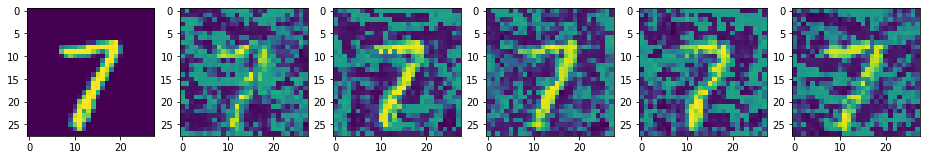

Starting 9th sample...
Epoch 1, loss 1.1789486408233643
Epoch 1001, loss 0.13974212110042572
Epoch 2001, loss 0.10592760890722275
Final loss 0.09994830936193466


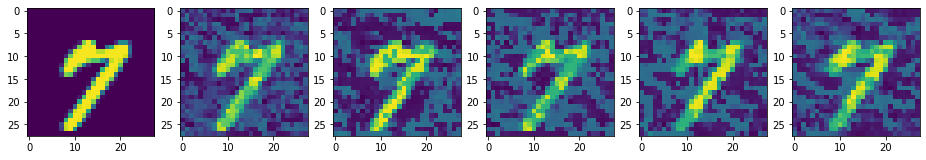

In [17]:
N = 10

for i in range(N):
    print(f'Starting {i}th sample...')
    
    # sample
    data, target = next(data_iter)

    # augment
    corrupted_images, output = dropviz.augment(model, model.fc2, device, data, 5, 10000, 0.1, 0.0001)
    
    # plot
    f, ax = plt.subplots(1, len(corrupted_images)+1, figsize=(16,20))
    ax[0].imshow(data.reshape(28, 28))
    for n in range(len(corrupted_images)):
        ax[n+1].imshow(corrupted_images[n])
    plt.show()